# Climate Starter: UCSD Data Science Bootcamp
## Joey Ashcroft
- Using SQLAlchemy ORM queries, Pandas, and Matplotlib to plan a trip to Hawaii

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis

In [9]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
# print the column names and types
columns = inspector.get_columns('Measurement')

In [10]:
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#get the date
last_date=session.query(func.max(Measurement.date)).scalar()
#parse the date
from dateutil.parser import parse
last_date=parse(last_date)
#date from a year ago
year_ago=dt.date(last_date.year-1, last_date.month, last_date.day)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame
prcp_scores = pd.DataFrame(prcp_scores)

# Sort the dataframe by date
prcp_scores = prcp_scores.sort_values(by=['date']).reset_index(drop=True)

#drop rows with na values and zeros
prcp_scores = prcp_scores.dropna()
prcp_plot=prcp_scores.drop(prcp_scores[prcp_scores['prcp']==0].index)

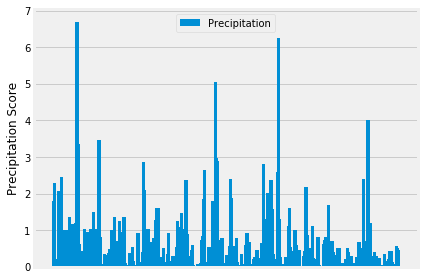

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(prcp_plot['date'], prcp_plot['prcp'], width=3)
plt.gca().axes.get_xaxis().set_visible(False)

#plot settings
plt.xlabel("Date")
plt.ylabel("Precipitation Score")
plt.legend(['Precipitation'],loc='upper center')
plt.tight_layout()
plt.grid(True)

plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement).group_by(Measurement.station).count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_ago).all()
temp_data=pd.DataFrame(temp_data)

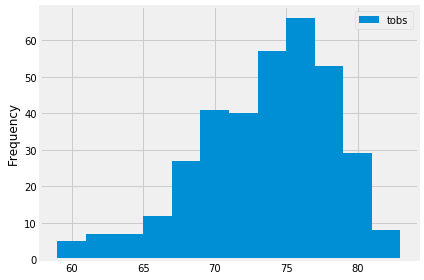

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(temp_data['tobs'], bins=12)

#plot settings
plt.ylabel("Frequency")
plt.legend(['tobs'],loc='upper right')
plt.tight_layout()
plt.grid(True)

plt.show()

In [ ]:
#an API is created for these results in the app.py file attached